In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import os
from IPython.display import HTML

In [5]:

# Load the image from the .npy file
image = np.load("data/processed/resampled/slice_0020.npy")
print(f"Processing {image}: shape {image.shape}")


Processing [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]: shape (119, 101)


In [7]:
import numpy as np
import os

# Assuming the folder path is correct and accessible
folder_path = "data/processed/resampled"
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.npy')]

# Load the first image to establish a reference shape
reference_shape = None
shape_mismatch_files = []

for file_path in file_paths:
    try:
        image = np.load(file_path)
        if reference_shape is None:
            reference_shape = image.shape
            print(f"Reference shape set to {reference_shape}")
        else:
            if image.shape != reference_shape:
                shape_mismatch_files.append((file_path, image.shape))
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")

reference_shape, shape_mismatch_files


Reference shape set to (119, 101)


((119, 101), [])

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import os

def load_npy_files(npy_dir):
    """Loads and sorts .npy files from a directory into a 3D numpy array."""
    files = [os.path.join(npy_dir, f) for f in sorted(os.listdir(npy_dir)) if f.endswith('.npy')]
    volumes = [np.load(f) for f in files]
    volume = np.stack(volumes)
    return volume

def create_animation(volume):
    """Creates an animation from a 3D numpy array."""
    ims = []
    fig, ax = plt.subplots()  # Create a figure and a set of subplots

    # Iterate through each slice of the volume
    for i in range(volume.shape[0]):  # Correctly iterate over the first dimension
        im = ax.imshow(volume[i], animated=True, cmap='gray')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50)  # Adjust interval as needed
    plt.close(fig)  # Close the figure to prevent it from displaying statically
    return ani

def main(npy_dir):
    volume = load_npy_files(npy_dir)
    ani = create_animation(volume)
    # Convert the animation to an HTML5 video and display it within the notebook
    return HTML(ani.to_html5_video())

if __name__ == "__main__":
    npy_dir = 'data/processed/resampled'  # Adjust as necessary
    display(main(npy_dir))


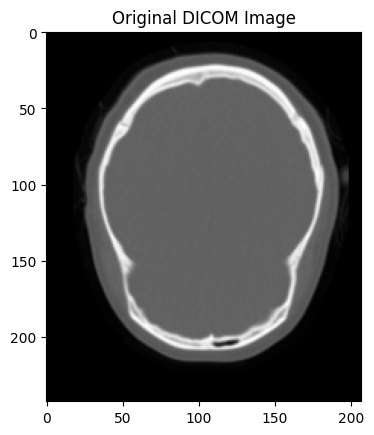

In [16]:
import pydicom
import matplotlib.pyplot as plt

# Load DICOM file
dicom_file = 'data/raw/KCL_0001/IMG0100.dcm'
ds = pydicom.dcmread(dicom_file)

# Get pixel array from DICOM file
pixel_array = ds.pixel_array

# Display DICOM image
plt.imshow(pixel_array, cmap='gray')
plt.title('Original DICOM Image')
plt.show()


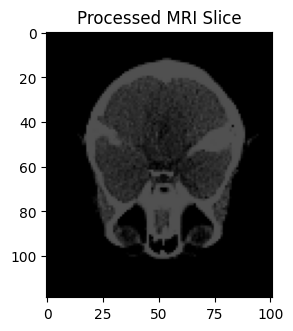

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Load original and processed MRI slices
processed_slice = np.load('data/processed/resampled/slice_0200.npy', allow_pickle=True)

# Convert numpy arrays to PIL images
processed_img = Image.fromarray(processed_slice)


plt.subplot(1, 2, 2)
plt.imshow(processed_img, cmap='gray')
plt.title('Processed MRI Slice')

plt.show()


In [1]:
from PIL import Image
import numpy as np
import glob

# Example paths, replace with actual paths if different
image_path_example = "./data/train/KCL_0001/IMG0071.png"
mask_path_example = "./data/train/sub-0001_space-MNI_T1w_brain_pve_1/sub-0001_space-MNI_T1w_brain_pve_1_slice_71.png"

# Load images
img_example = Image.open(image_path_example)
mask_example = Image.open(mask_path_example)

# Convert to numpy arrays to check shape
img_array = np.array(img_example)
mask_array = np.array(mask_example)

# Print shapes
print("Image shape:", img_array.shape)
print("Mask shape:", mask_array.shape)


Image shape: (243, 207)
Mask shape: (207, 243)


In [6]:
import pydicom

# Replace with your actual DICOM file path
dcm_file_path = './data/raw/KCL_0001/IMG0001.dcm'

# Load the DICOM file
dcm_data = pydicom.dcmread(dcm_file_path)

# Access the pixel data and print its shape
print("DICOM image shape:", dcm_data.pixel_array.shape)


DICOM image shape: (243, 207)


In [7]:
import nibabel as nib

# Replace with your actual NIfTI file path
nii_file_path = './GM/sub-0001_space-MNI_T1w_brain_pve_1.nii.gz'

# Load the NIfTI file
nii_data = nib.load(nii_file_path)

# Get the data as a numpy array and print its shape
print("NIfTI image shape:", nii_data.get_fdata().shape)


NIfTI image shape: (207, 243, 226)
